In [1]:
import pandas as pd  # Importing the pandas library for data manipulation and analysis
import numpy as np   # Importing the numpy library for numerical computing
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv(r"Automobile_data.csv")#Reading file from system and saving it in df(dataframe)

In [3]:
df.head() # It will return top 5 rows

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.tail() # It will return bottom 5 rows

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [5]:
df.isnull().sum() #It will return sum of null values

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
df.isna().sum() # it will return sum of na(not available)

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info() #Displays the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Outcome of df.info()
These columns "price, horsepower, peak-rpm, stroke, bore" should be numeric but there data type is object 

In [9]:
df.describe() # Gives 

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


# EDA (Exploratory Data Analysis)

In [10]:
# Get the data types of each column in the DataFrame
data_types = df.dtypes

# Print the data types
print(data_types)


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


As df.info() already showed us that there are some columns which should be numeric but they
are in categorical column and df.dtypes also shows the same so let's handle it first

In [11]:
# Let's convert wrong datatype into right datatype
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce')
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')
df['bore'] = pd.to_numeric(df['bore'], errors='coerce')
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')

In [12]:
# Get the data types of each column in the DataFrame
data_types = df.dtypes

# Print the data types
print(data_types)


symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


Now, it's having the appropriate data type

In [13]:
fuel_type = df['fuel-type'].value_counts()
print(fuel_type)


gas       185
diesel     20
Name: fuel-type, dtype: int64


In [14]:
body = df['body-style'].value_counts()
print(body)


sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64


In [15]:
company=df['make'].value_counts()
print(company)

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64


In [16]:
make_horsepower = df.groupby('make')['horsepower'].max()
print(make_horsepower)


make
alfa-romero      154.0
audi             160.0
bmw              182.0
chevrolet         70.0
dodge            145.0
honda            101.0
isuzu             90.0
jaguar           262.0
mazda            135.0
mercedes-benz    184.0
mercury          175.0
mitsubishi       145.0
nissan           200.0
peugot           142.0
plymouth         145.0
porsche          288.0
renault            NaN
saab             160.0
subaru           111.0
toyota           161.0
volkswagen       110.0
volvo            162.0
Name: horsepower, dtype: float64


In [17]:
df.nunique()

symboling              6
normalized-losses     51
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  38
stroke                36
compression-ratio     32
horsepower            59
peak-rpm              23
city-mpg              29
highway-mpg           30
price                186
dtype: int64

In [18]:
df.corr()

C:\Users\Pratik Kamble\AppData\Local\Temp\ipykernel_2760\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.528667,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.134205,-0.008965,-0.178515,0.071622,0.274573,-0.035823,0.034606,-0.082391
normalized-losses,0.528667,1.000000,-0.074362,0.023220,0.105073,-0.432335,0.119893,0.167365,-0.036167,0.065627,-0.132654,0.295772,0.264597,-0.258502,-0.210768,0.203254
wheel-base,-0.531954,-0.074362,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.490378,0.161477,0.249786,0.352297,-0.361052,-0.470414,-0.544082,0.584642
length,-0.357612,0.023220,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.607480,0.129739,0.158414,0.555003,-0.287325,-0.670909,-0.704662,0.690628
width,-0.232919,0.105073,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559204,0.182956,0.181129,0.642482,-0.219957,-0.642704,-0.677218,0.751265
height,-0.541038,-0.432335,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.176195,-0.056999,0.261214,-0.110711,-0.322272,-0.048640,-0.107358,0.135486
curb-weight,-0.227691,0.119893,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.649045,0.168929,0.151362,0.751034,-0.266306,-0.757414,-0.797465,0.834415
engine-size,-0.105790,0.167365,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.594090,0.206675,0.028971,0.810773,-0.244618,-0.653658,-0.677470,0.872335
bore,-0.134205,-0.036167,0.490378,0.607480,0.559204,0.176195,0.649045,0.594090,1.000000,-0.055909,0.005203,0.577273,-0.264269,-0.594584,-0.594572,0.543436
stroke,-0.008965,0.065627,0.161477,0.129739,0.182956,-0.056999,0.168929,0.206675,-0.055909,1.000000,0.186170,0.090254,-0.071493,-0.042906,-0.044528,0.082310


C:\Users\Pratik Kamble\AppData\Local\Temp\ipykernel_2760\2455381739.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


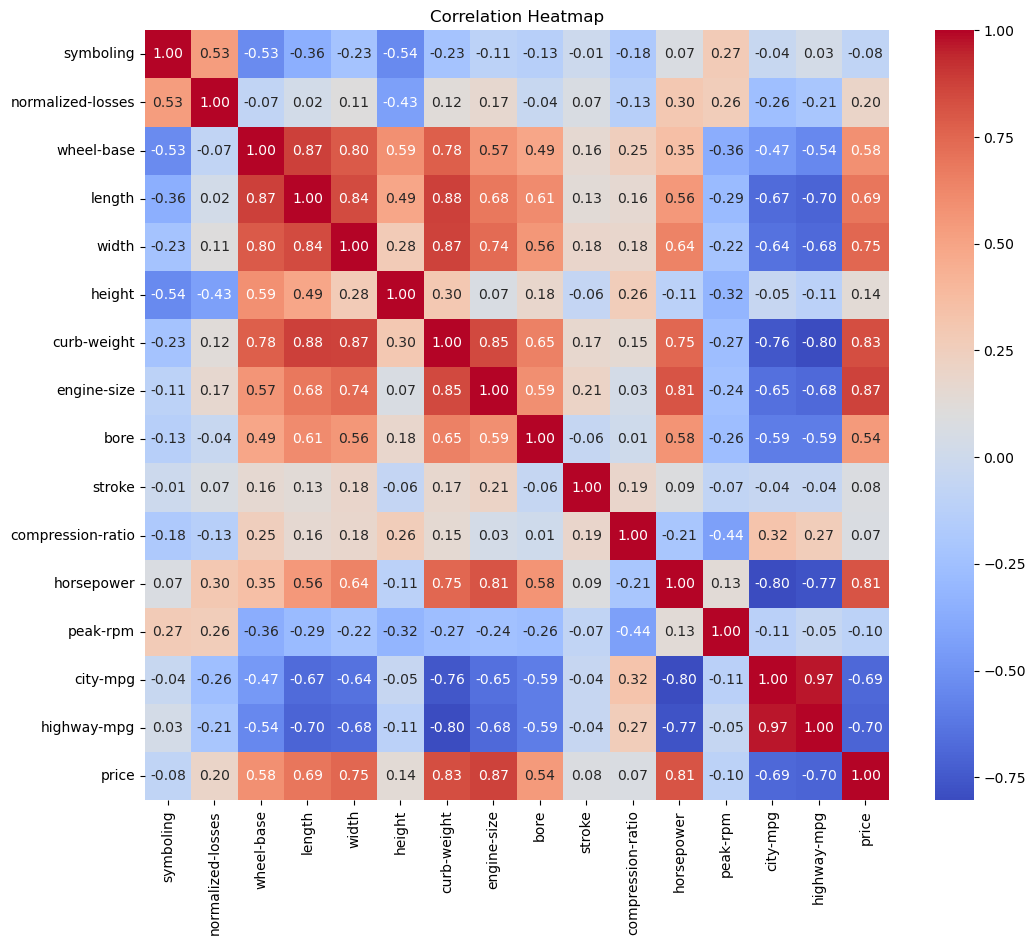

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Make sure 'price' is one of the columns in your DataFrame

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Correlation's Insights
1. Vehicle Size and Dimensions:
There is a strong positive correlation between wheel-base, length, width, and curb-weight. This suggests that larger vehicles tend to have longer wheelbases, greater lengths, wider widths, and higher curb weights.

2. Fuel Efficiency:
There is a strong negative correlation between city-mpg and highway-mpg, indicating that vehicles with higher city miles per gallon tend to have higher highway miles per gallon as well. This suggests that fuel efficiency in city driving is often indicative of fuel efficiency on highways.

3. Vehicle Performance:
There is a positive correlation between engine-size and curb-weight, suggesting that vehicles with larger engines tend to have higher curb weights. This might indicate that larger engines are often found in heavier vehicles, which could impact performance and fuel efficiency.

4. Safety and Performance Features:
The correlation between symboling (a measure of insurance risk rating) and other features like normalized-losses, wheel-base, and height suggests potential relationships between safety ratings, vehicle dimensions, and insurance risk.

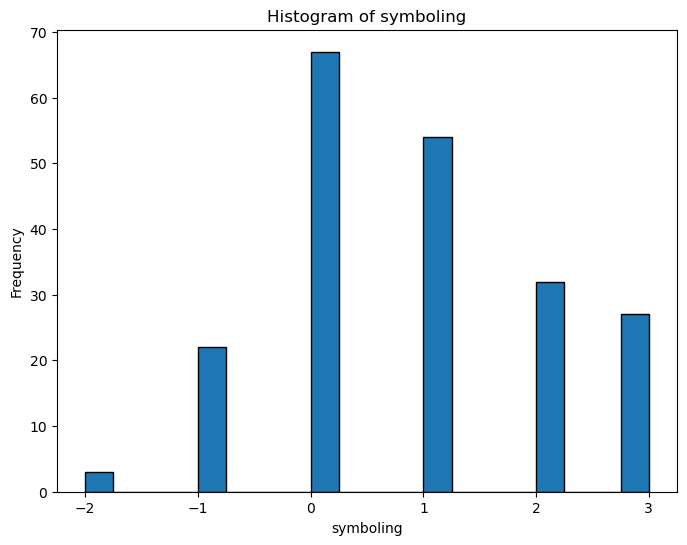

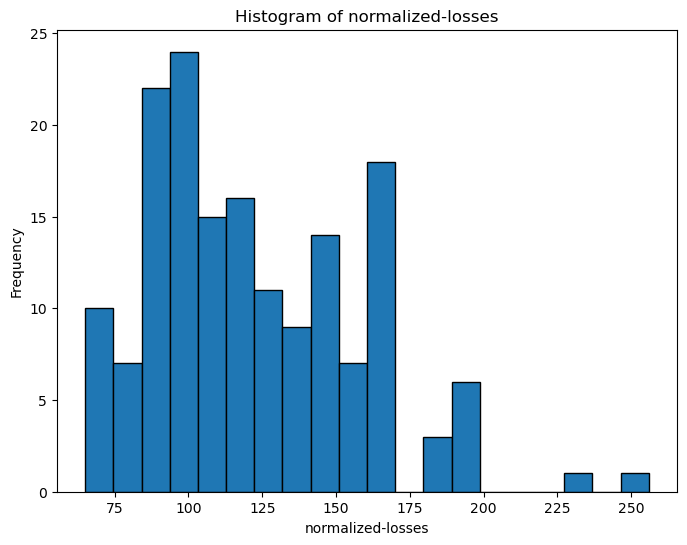

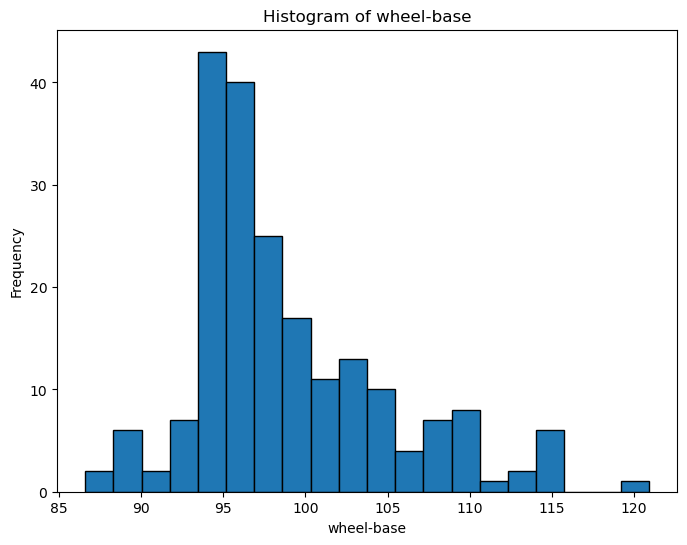

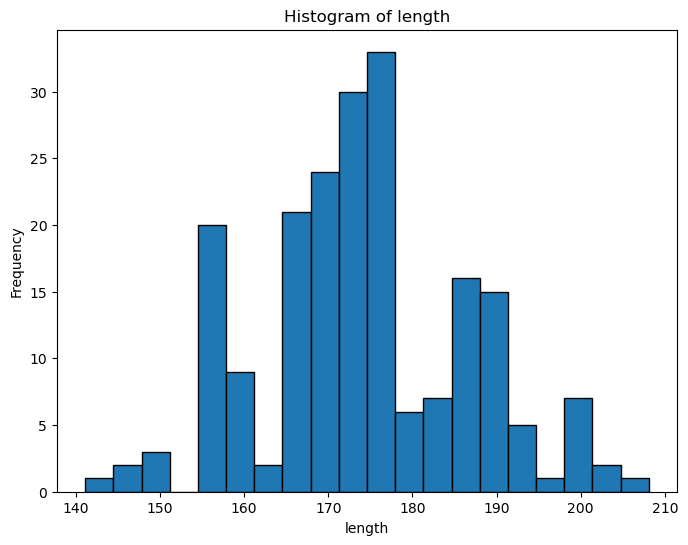

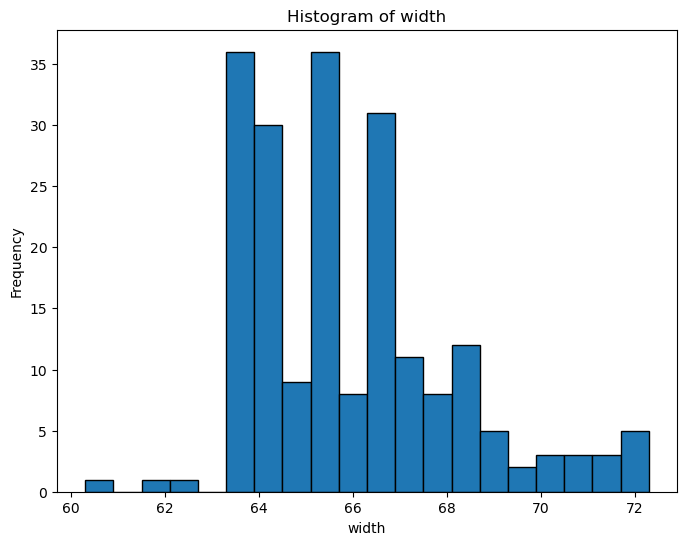

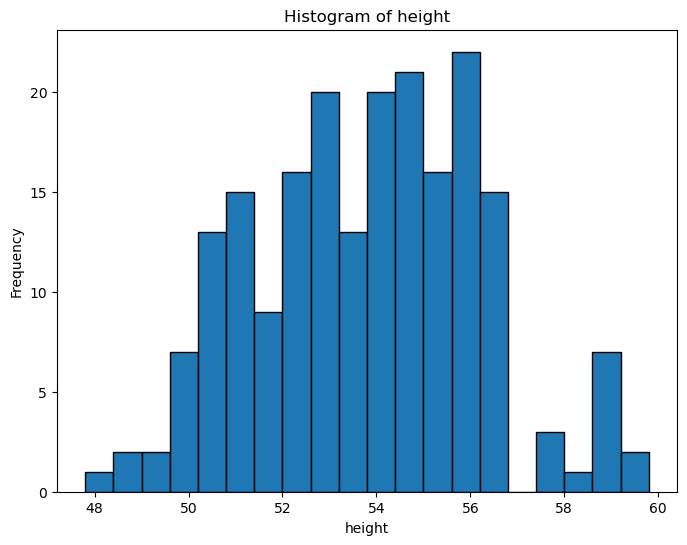

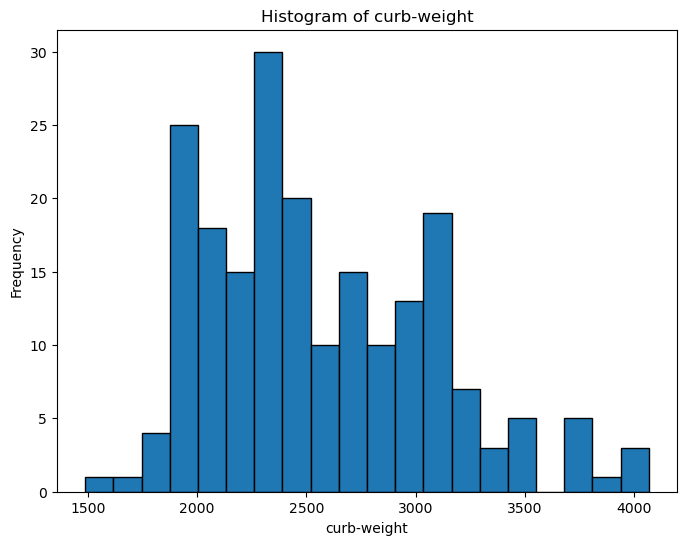

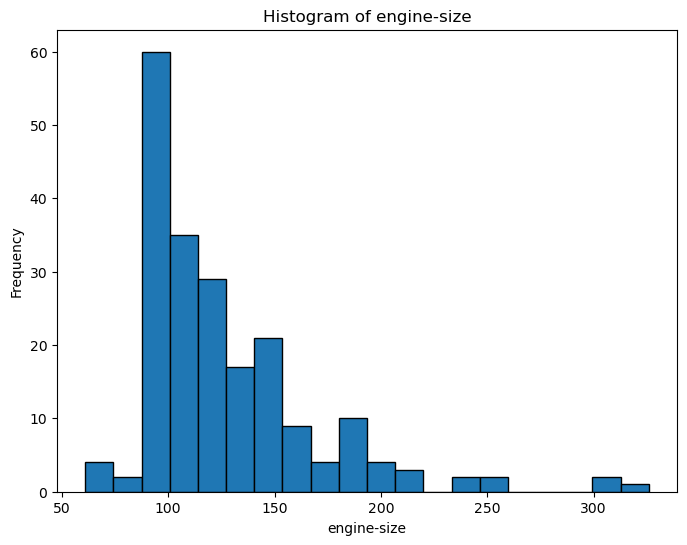

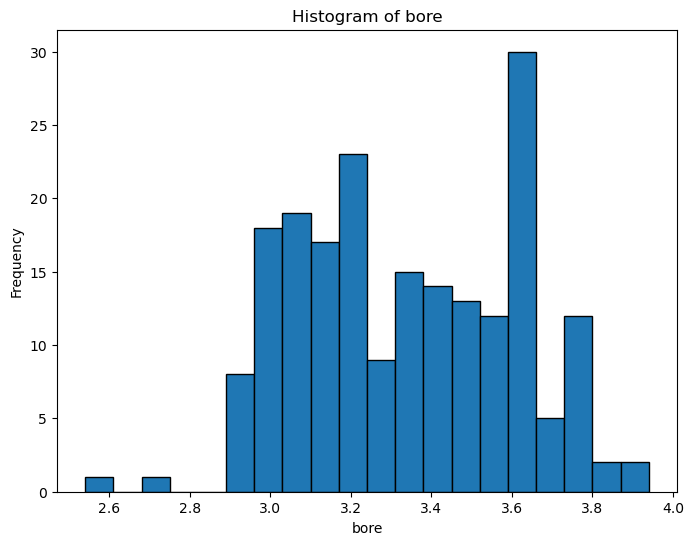

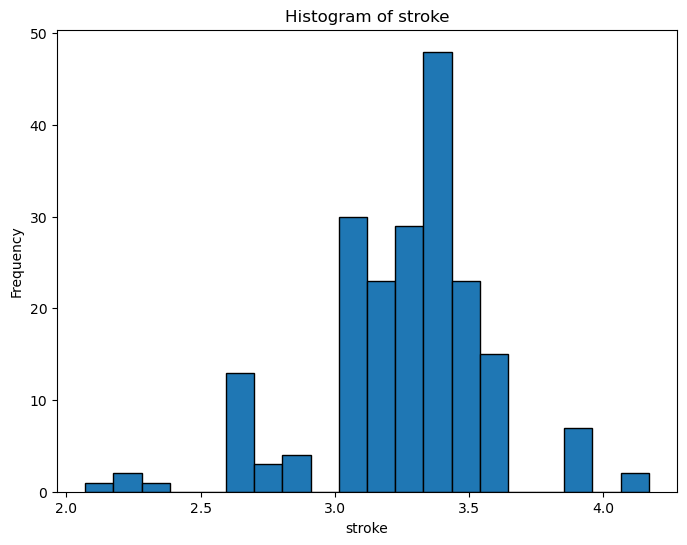

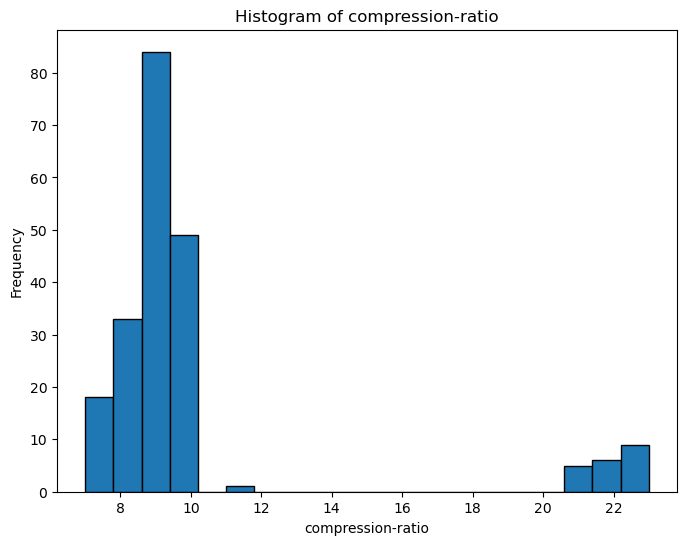

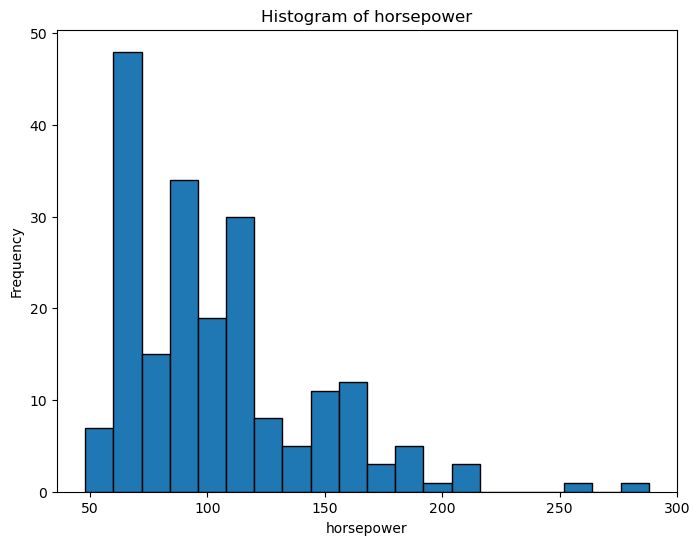

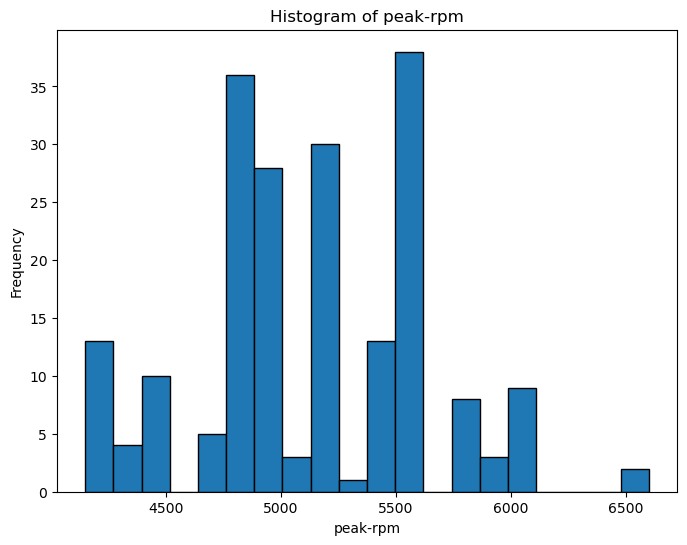

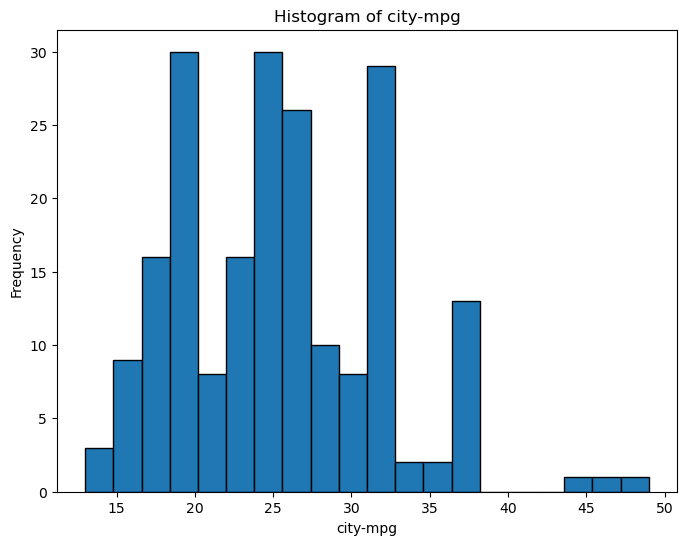

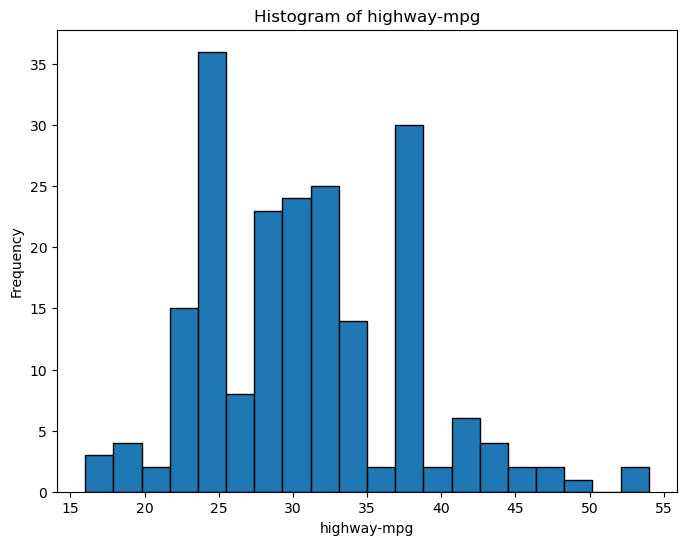

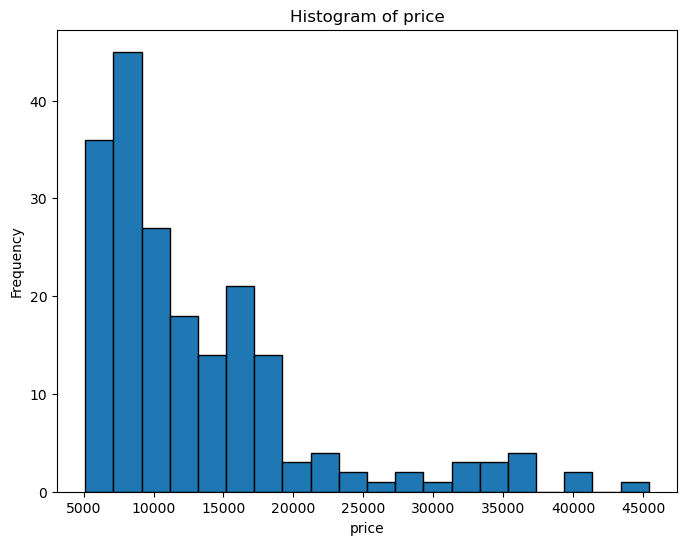

In [20]:
# Plot histograms for numerical variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col].dropna(), bins=20, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

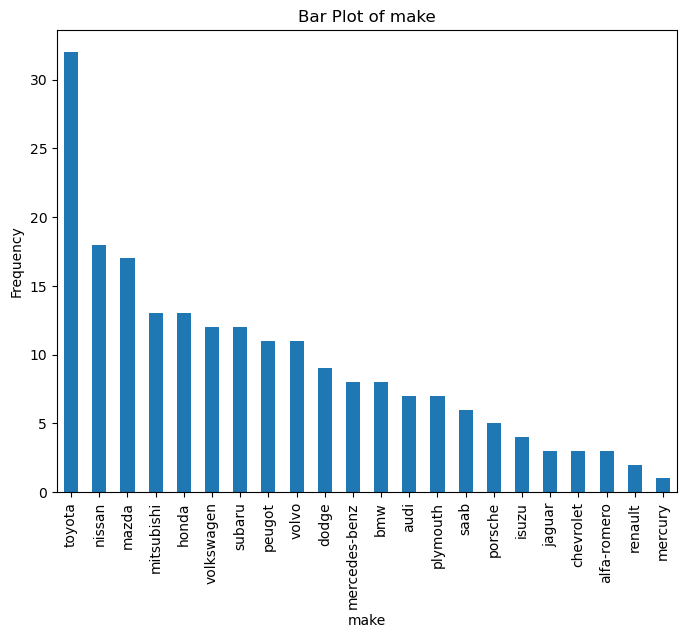

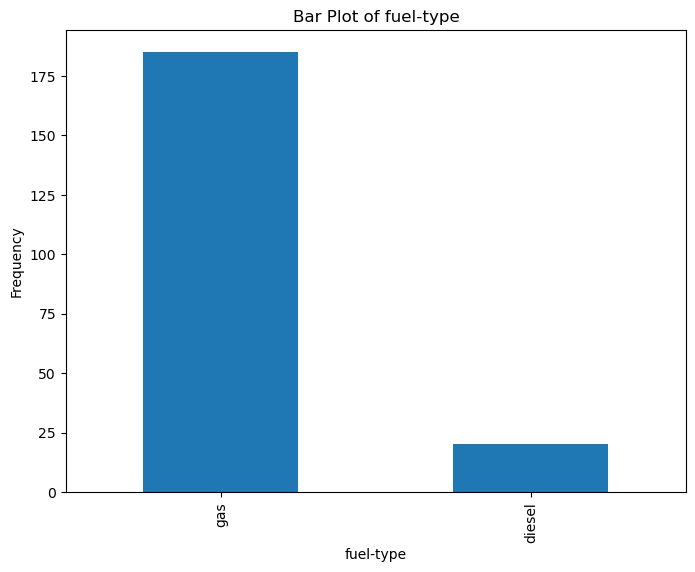

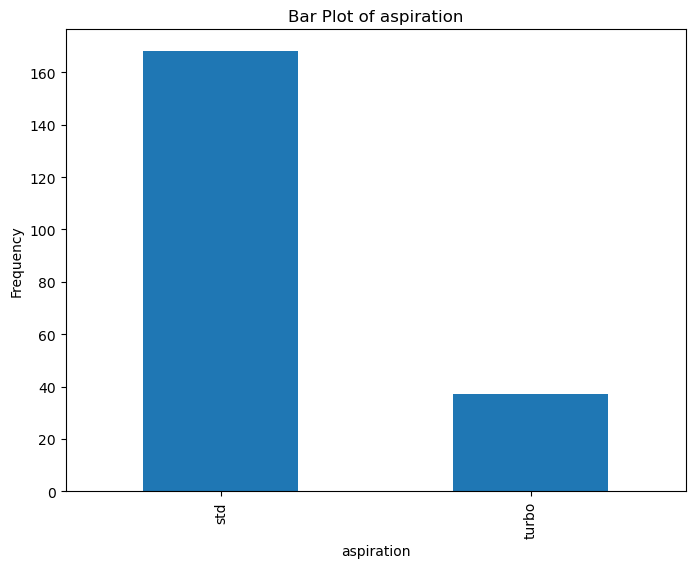

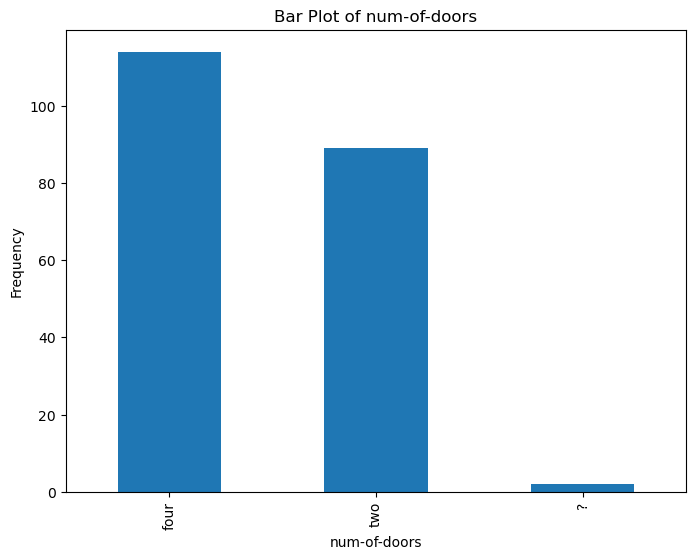

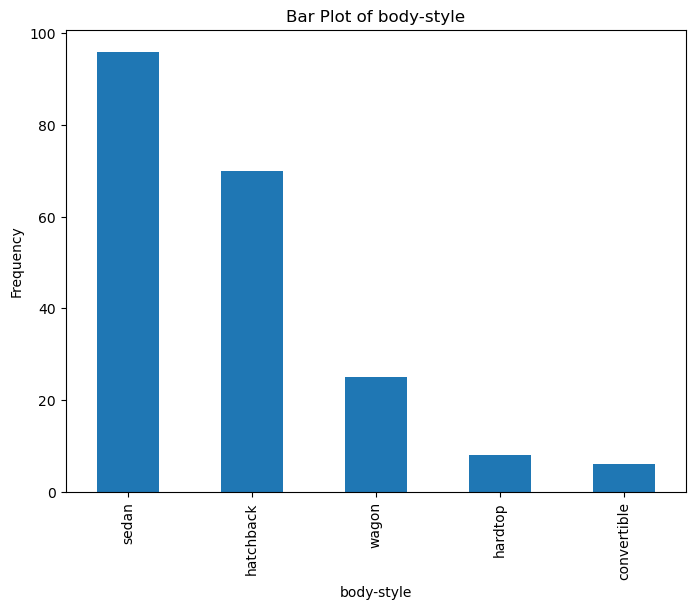

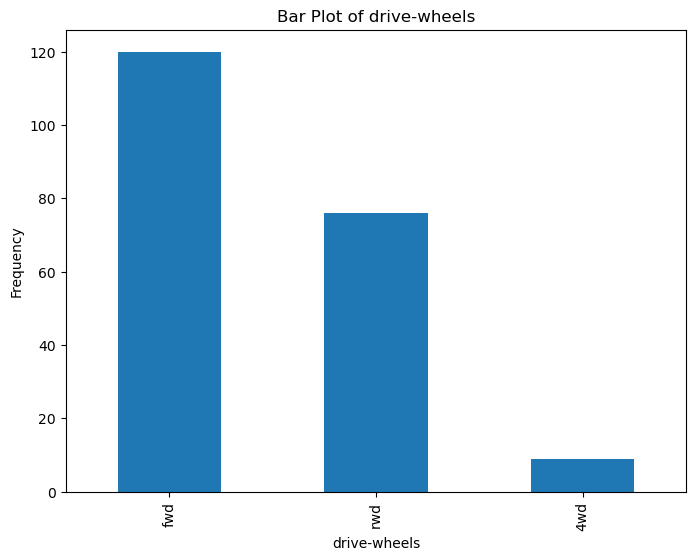

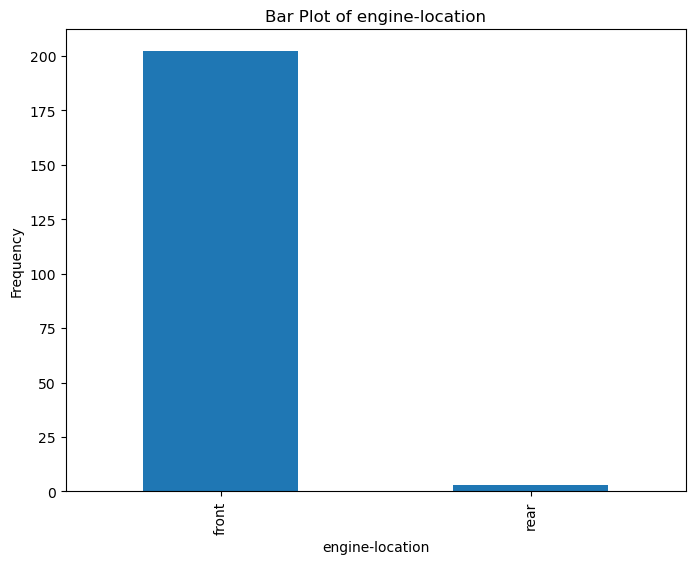

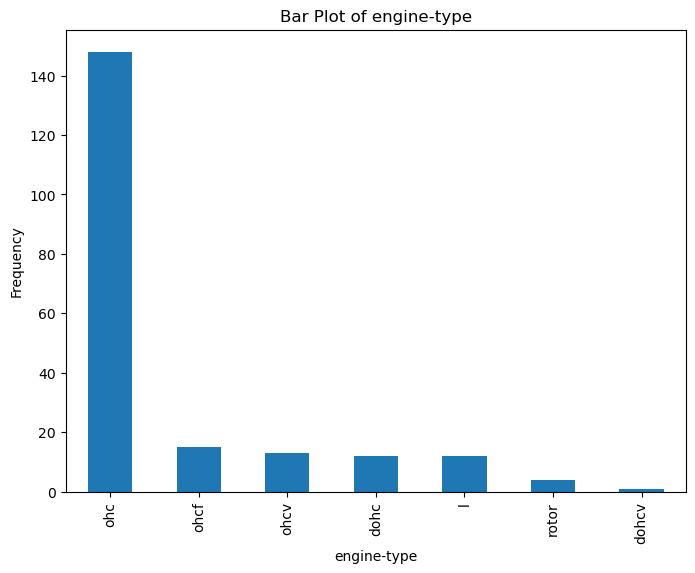

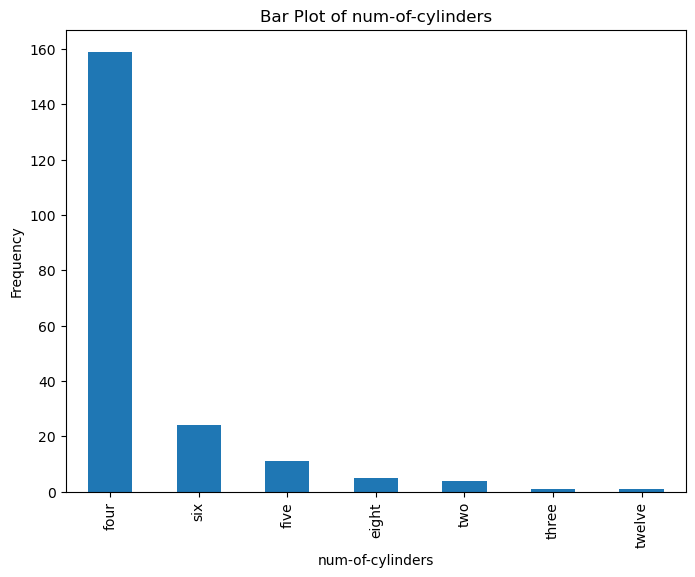

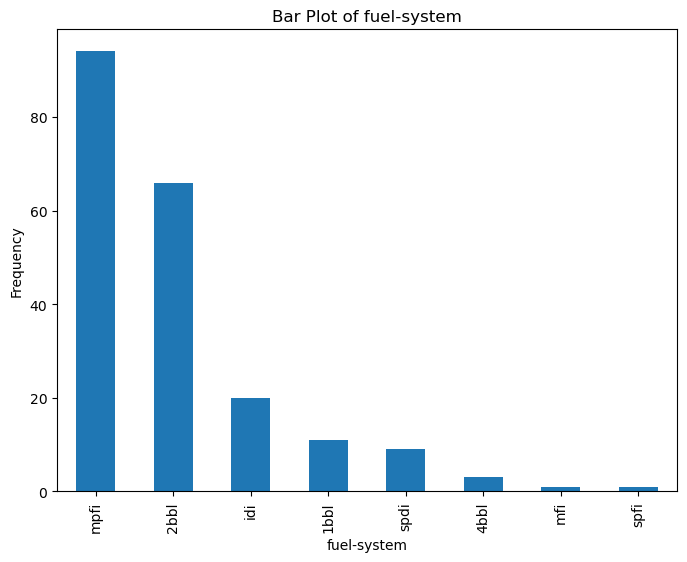

In [21]:
# Plot bar plots for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

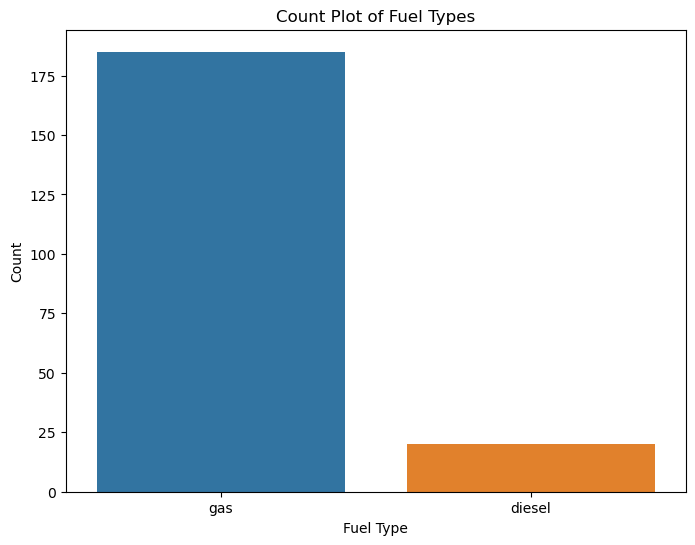

In [22]:
# Count plot for diesel and petrol engines
plt.figure(figsize=(8, 6))
sns.countplot(x='fuel-type', data=df)
plt.title('Count Plot of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

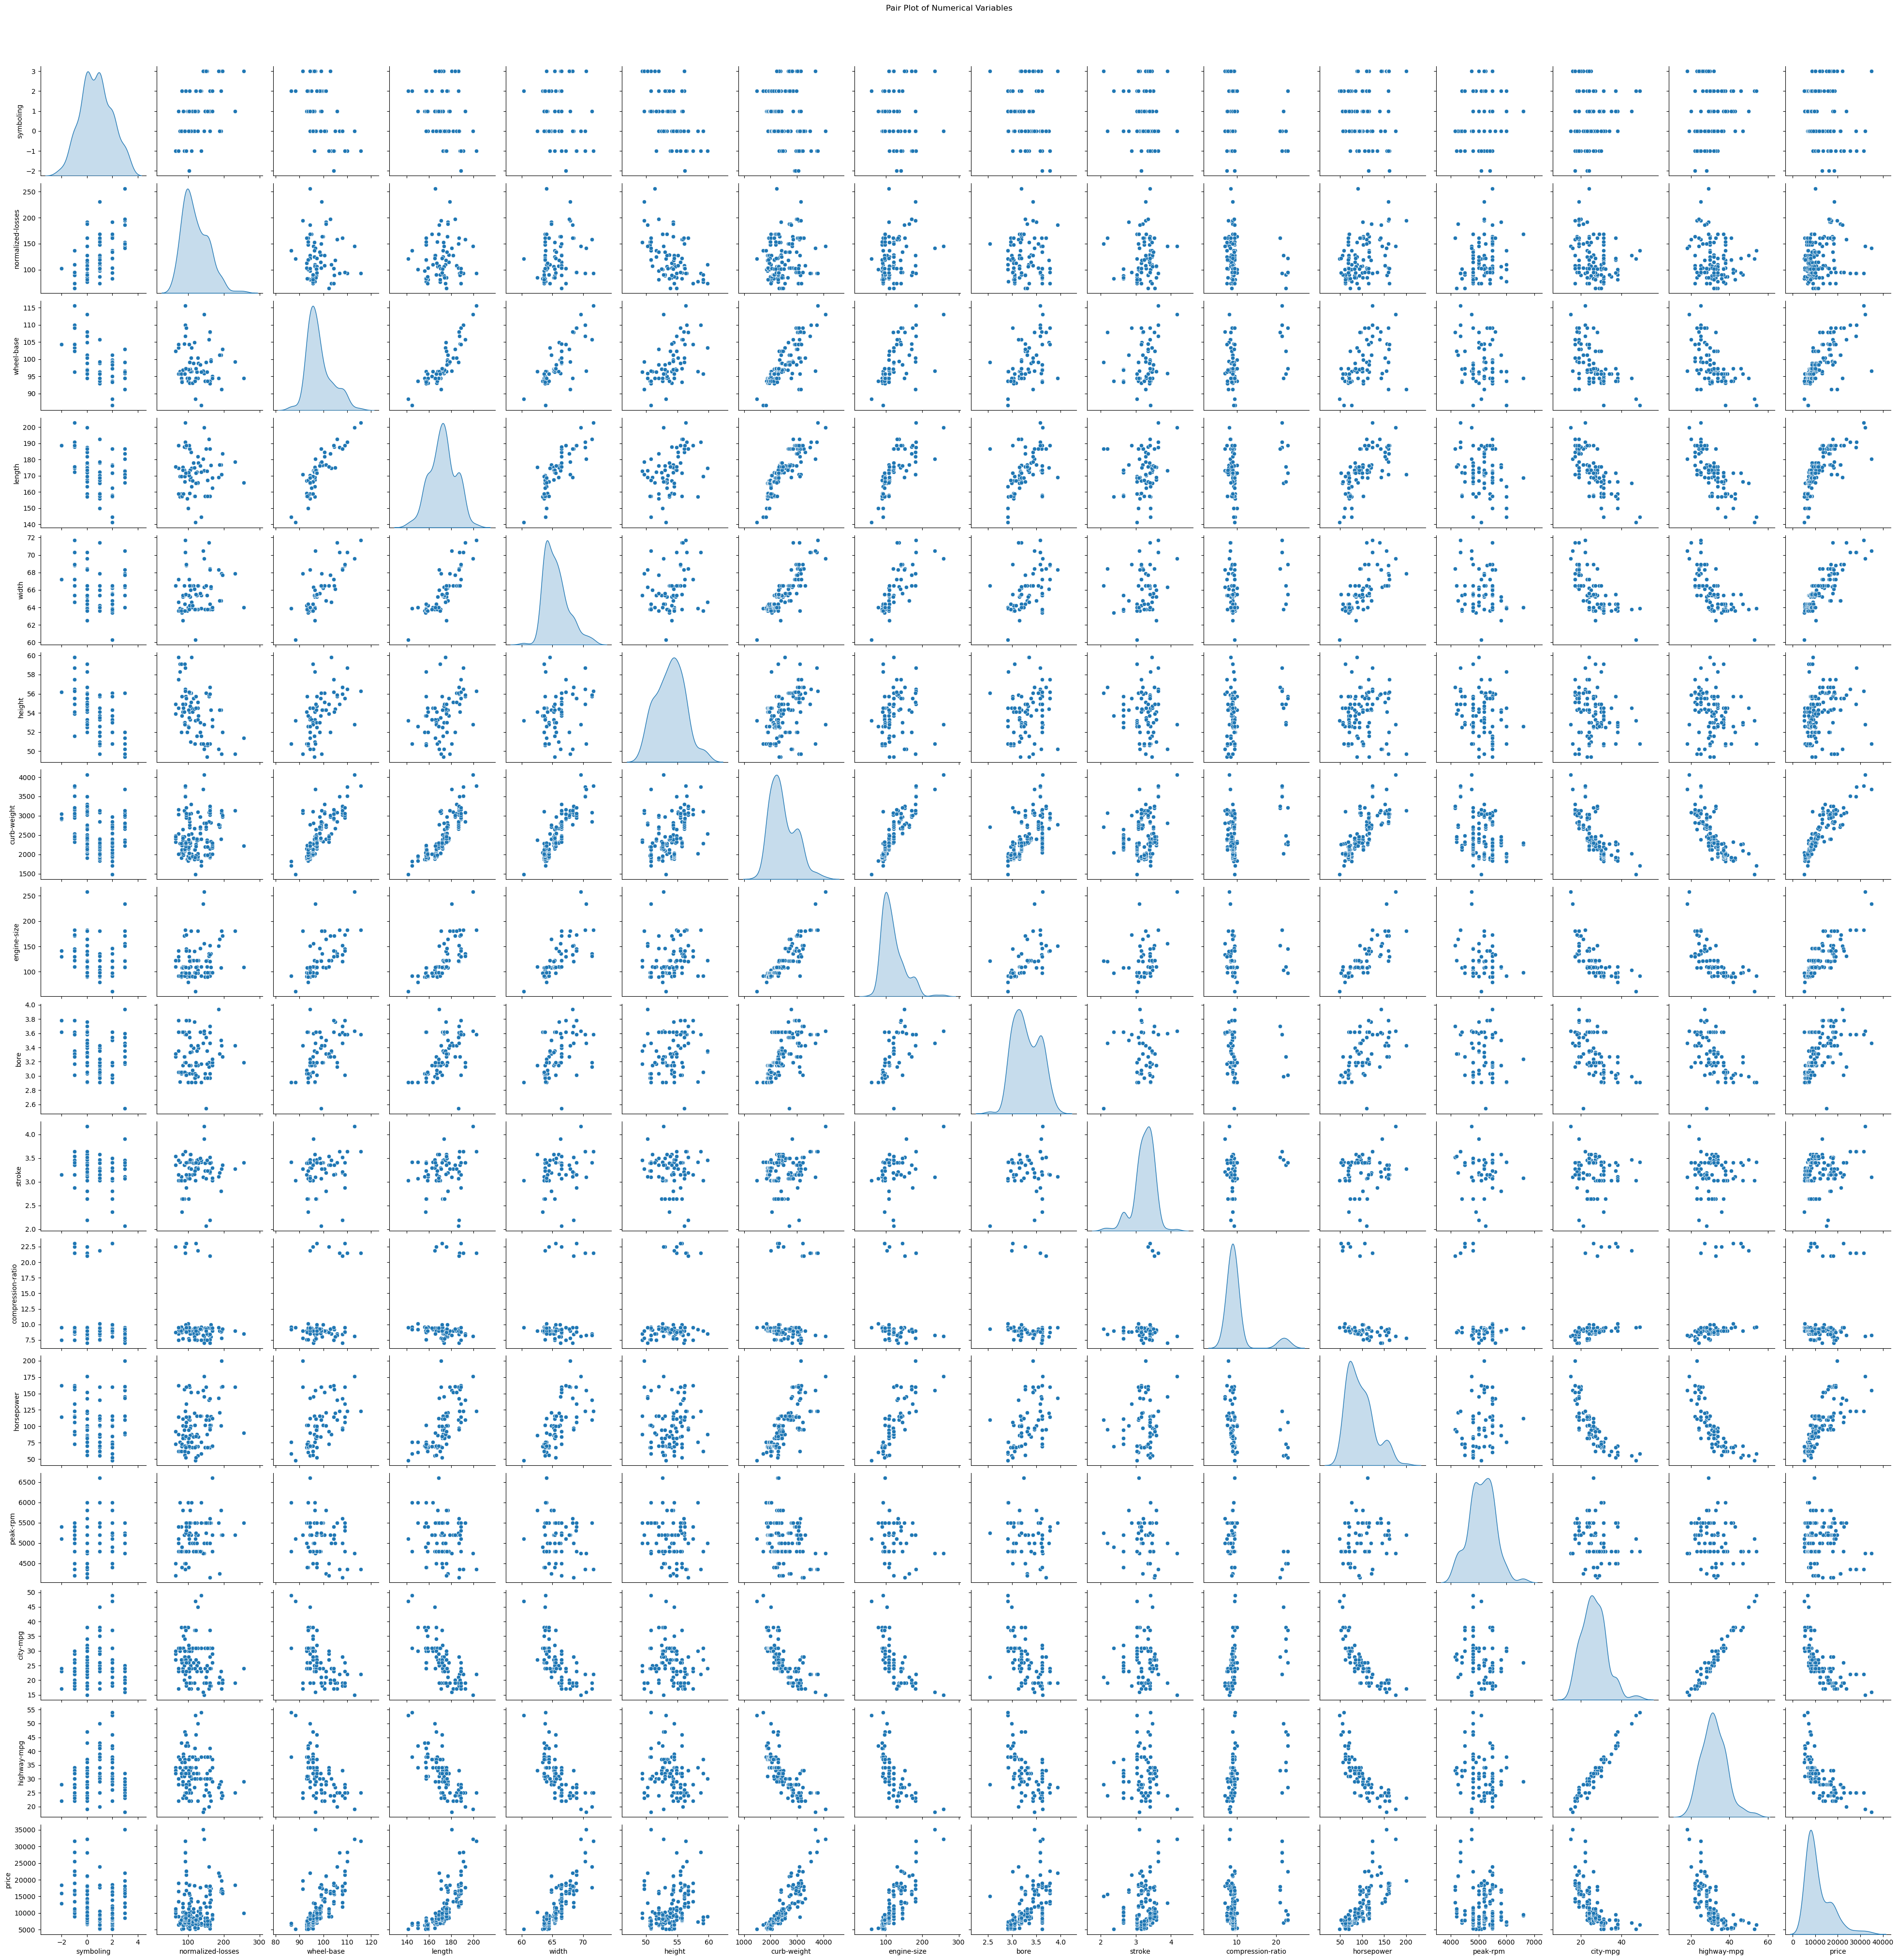

In [23]:
# Plot pair plots for numerical variables to visualize pairwise relationships
sns.pairplot(df[numerical_cols].dropna(), diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

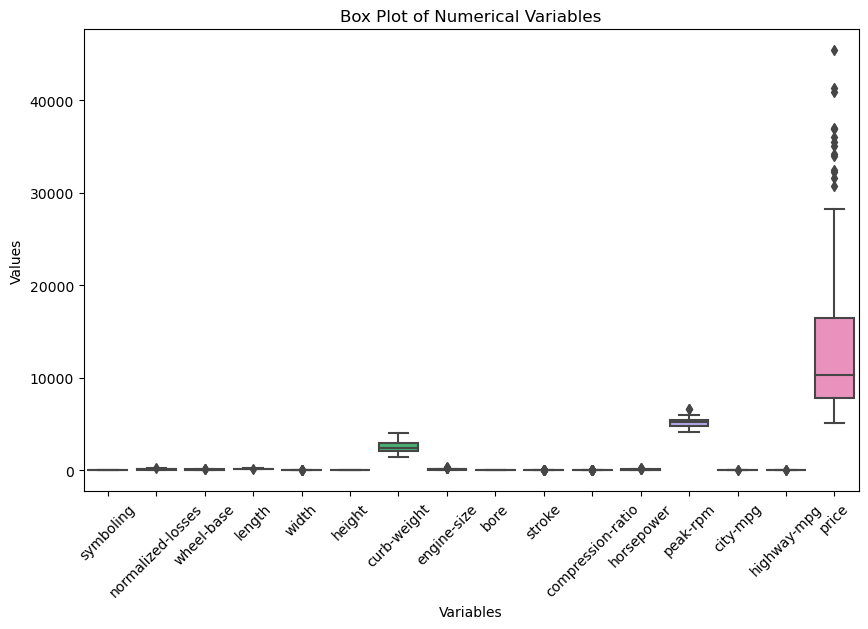

In [24]:
# Plot box plots for numerical variables to identify outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plot of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# Data Processing

In [25]:
engine_type = df['engine-type'].value_counts()
print(engine_type)
#Here is an type typo it should be "dohc" but it mistakenly it is "dohcv"

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64


In [26]:
df['engine-type']=df['engine-type'].replace("dohcv","dohc")
#Here, we have replaced "dohcv" with "dohc"

In [27]:
engine_type = df['engine-type'].value_counts()
print(engine_type)
#Now the typo has been fixed

ohc      148
ohcf      15
dohc      13
ohcv      13
l         12
rotor      4
Name: engine-type, dtype: int64


In [28]:

# Find all occurrences of "?" in the entire dataset
question_marks = df[df == '?']

# Get the column-wise count of "?" occurrences
question_marks_count = question_marks.count()

# Locate which columns contain "?"
columns_with_question_marks = question_marks_count[question_marks_count > 0]

# Print the columns and their corresponding "?" counts
print(columns_with_question_marks)


num-of-doors    2
dtype: int64


In [29]:
# Replace "?" with NaN
df.replace('?', np.nan, inplace=True)

# Convert columns to numeric (if not already)

df['bore'] = pd.to_numeric(df['bore'], errors='coerce')
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Replace NaN values with the mode (for categorical) or mean (for numerical)

df['bore'].fillna(df['bore'].mean(), inplace=True)
df['stroke'].fillna(df['stroke'].mean(), inplace=True)
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)
df['peak-rpm'].fillna(df['peak-rpm'].mean(), inplace=True)
df['price'].fillna(df['price'].mean(), inplace=True)


In [30]:

# Find all occurrences of "?" in the entire dataset
question_marks = df[df == '?']

# Get the column-wise count of "?" occurrences
question_marks_count = question_marks.count()

# Locate which columns contain "?"
columns_with_question_marks = question_marks_count[question_marks_count > 0]

# Print the columns and their corresponding "?" counts
print(columns_with_question_marks)


Series([], dtype: int64)


In [31]:
question_marks_count

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [32]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [33]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [34]:
import pandas as pd

# Assuming df is your DataFrame after handling outliers

# Replace 'path_to_output_csv_file.csv' with the desired output CSV file path
output_csv_file_path = r'C:\Users\Pratik Kamble\Downloads\Capstone Project\handled.xlsx'

# Save the DataFrame to a CSV file
df.to_excel(output_csv_file_path, index=False)

print(f"DataFrame saved to {output_csv_file_path}")


DataFrame saved to C:\Users\Pratik Kamble\Downloads\Capstone Project\handled.xlsx


# Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame (replace this with your actual DataFrame)
# Assuming df is your DataFrame containing categorical columns
# Replace 'categorical_columns' with the actual names of your categorical columns
categorical_columns = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'fuel-system', 'engine-type', 'num-of-cylinders']
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Now your categorical columns are encoded with numerical labels instead of one-hot encoding


In [36]:
df.dtypes

symboling              int64
normalized-losses    float64
make                   int32
fuel-type              int32
aspiration             int32
num-of-doors           int32
body-style             int32
drive-wheels           int32
engine-location        int32
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type            int32
num-of-cylinders       int32
engine-size            int64
fuel-system            int32
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [37]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [38]:
df.corr()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.528667,-0.118794,0.194311,-0.059866,0.625944,-0.596135,-0.041671,0.212471,-0.531954,...,-0.105790,0.091163,-0.130083,-0.008689,-0.178515,0.071389,0.273679,-0.035823,0.034606,-0.082201
normalized-losses,0.528667,1.000000,-0.288361,0.116736,-0.007797,0.408273,-0.317903,0.359464,NaN,-0.074362,...,0.167365,0.254689,-0.033577,0.066315,-0.132654,0.295772,0.264597,-0.258502,-0.210768,0.203254
make,-0.118794,-0.288361,1.000000,-0.113191,0.054265,-0.182585,0.089494,-0.004317,0.054608,0.078505,...,-0.070918,0.146624,0.251152,-0.201043,0.138828,-0.053654,-0.218342,0.053642,0.050022,-0.161471
fuel-type,0.194311,0.116736,-0.113191,1.000000,-0.401397,0.129503,-0.147853,-0.132257,0.040070,-0.308346,...,-0.069594,0.041529,-0.054457,-0.241820,-0.984356,0.165190,0.477060,-0.255963,-0.191392,-0.110207
aspiration,-0.059866,-0.007797,0.054265,-0.401397,1.000000,-0.019265,0.063028,0.066465,-0.057191,0.257611,...,0.108217,0.288086,0.212623,0.222970,0.295541,0.240182,-0.183629,-0.202362,-0.254416,0.177285
num-of-doors,0.625944,0.408273,-0.182585,0.129503,-0.019265,1.000000,-0.640256,0.078301,0.128765,-0.437162,...,-0.028701,0.020715,-0.120738,0.022840,-0.116988,0.102525,0.226345,0.041322,0.064732,-0.057180
body-style,-0.596135,-0.317903,0.089494,-0.147853,0.063028,-0.640256,1.000000,-0.155745,-0.277009,0.401362,...,-0.073352,-0.065079,0.010562,-0.015344,0.136243,-0.152438,-0.109410,0.031697,-0.007170,-0.072677
drive-wheels,-0.041671,0.359464,-0.004317,-0.132257,0.066465,0.078301,-0.155745,1.000000,0.147865,0.459745,...,0.524307,0.424686,0.481805,0.071623,0.127479,0.516936,-0.039724,-0.449581,-0.452220,0.576866
engine-location,0.212471,NaN,0.054608,0.040070,-0.057191,0.128765,-0.277009,0.147865,1.000000,-0.187790,...,0.196826,0.105971,0.185044,-0.138459,-0.019762,0.317610,0.198400,-0.153487,-0.102026,0.331013
wheel-base,-0.531954,-0.074362,0.078505,-0.308346,0.257611,-0.437162,0.401362,0.459745,-0.187790,1.000000,...,0.569329,0.384601,0.488760,0.160944,0.249786,0.351957,-0.360704,-0.470414,-0.544082,0.583168


In [39]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [40]:
df.describe()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,12.195122,0.902439,0.180488,0.453659,2.614634,1.326829,0.014634,98.756585,...,126.907317,3.253659,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.274831,0.297446,0.385535,0.518339,0.859081,0.556171,0.120377,6.021776,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,8.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,115.000000,12.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,150.000000,19.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,21.000000,1.000000,1.000000,2.000000,4.000000,2.000000,1.000000,120.900000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Outlier Handling

In [41]:
import numpy as np

# Calculate the first quartile (Q1)
Q1 = df['price'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outlier values with the bounds
df['price'] = np.where(df['price'] < lower_bound, lower_bound, df['price'])
df['price'] = np.where(df['price'] > upper_bound, upper_bound, df['price'])


In [42]:
df.describe()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,12.195122,0.902439,0.180488,0.453659,2.614634,1.326829,0.014634,98.756585,...,126.907317,3.253659,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,12770.119597
std,1.245307,35.442168,6.274831,0.297446,0.385535,0.518339,0.859081,0.556171,0.120377,6.021776,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,6591.387748
min,-2.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,8.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,115.000000,12.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,150.000000,19.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,21.000000,1.000000,1.000000,2.000000,4.000000,2.000000,1.000000,120.900000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,29568.000000


# Feature Scaling

In [43]:
columns_to_drop = ['make', 'fuel-type', 'num-of-doors', 'body-style', 'engine-type', 'num-of-cylinders','symboling','normalized-losses','wheel-base','bore','stroke','compression-ratio','peak-rpm','height']
df.drop(columns=columns_to_drop, inplace=True)


In [44]:
df.head(1)

,aspiration,drive-wheels,engine-location,length,width,curb-weight,engine-size,fuel-system,horsepower,city-mpg,highway-mpg,price
0,0,2,0,168.8,64.1,2548,130,5,111.0,21,27,13495.0


In [45]:
# Split data into features (X) and target variable (y)
X = df.drop(columns=['price'])  # Dropping the target column from the features
y = df['price']  # Assigning the target column to y



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data
X_train_normalized = scaler.fit_transform(X_train)

# Apply the scaler to transform the training data
X_test_normalized = scaler.transform(X_test)


In [48]:
# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()  # Include K-nearest neighbors regression
}

# Define a pipeline with standard scaling and the model
pipeline = make_pipeline(StandardScaler(), None)

# Dictionary to store results
results = {}
# Evaluate each model
for name, model in models.items():
    pipeline.steps[1] = (name, model)  # Set the model in the pipeline
    cv_results = cross_validate(pipeline, X_train_normalized , y_train, cv=5, scoring=('neg_mean_squared_error', 'r2'), return_train_score=True)
    results[name] = {
        'Train MSE': -cv_results['train_neg_mean_squared_error'].mean(),
        'Test MSE': -cv_results['test_neg_mean_squared_error'].mean(),
        'Train R2 Score': cv_results['train_r2'].mean(),
        'Test R2 Score': cv_results['test_r2'].mean()
    }

# Print results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Train MSE: {metrics['Train MSE']}")
    print(f"Test MSE: {metrics['Test MSE']}")
    print(f"Train R2 Score: {metrics['Train R2 Score']}")
    print(f"Test R2 Score: {metrics['Test R2 Score']}")
    print("-" * 20)


Model: Linear Regression
Train MSE: 6177289.885462081
Test MSE: 9200018.818893846
Train R2 Score: 0.8493944954521337
Test R2 Score: 0.7761872584316961
--------------------
Model: Ridge Regression
Train MSE: 6182235.483801143
Test MSE: 8963336.572624907
Train R2 Score: 0.8492743517847318
Test R2 Score: 0.7817597770214164
--------------------
Model: Lasso Regression
Train MSE: 6177376.584685341
Test MSE: 9172106.076894205
Train R2 Score: 0.8493923874930122
Test R2 Score: 0.7768621842393995
--------------------
Model: Random Forest
Train MSE: 1110215.8513250197
Test MSE: 6886378.6081402
Train R2 Score: 0.972934609850691
Test R2 Score: 0.8286048675684878
--------------------
Model: SVR
Train MSE: 44915120.9920928
Test MSE: 45772171.20585772
Train R2 Score: -0.09581118587594277
Test R2 Score: -0.12497716140779014
--------------------
Model: KNN
Train MSE: 5683854.099889943
Test MSE: 8954048.635870783
Train R2 Score: 0.8611910192328208
Test R2 Score: 0.7677547084318432
--------------------


In [49]:
# Define the Random Forest model
rf = RandomForestRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_normalized , y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train_normalized , y_train)

# Evaluate the model on both the training and test sets
train_predictions = best_rf.predict(X_train_normalized )
train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

test_predictions = best_rf.predict(X_test_normalized)
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Best Hyperparameters:", best_params)
print("Training MSE:", train_mse)
print("Training R2 Score:", train_r2)
print("Test MSE:", test_mse)
print("Test R2 Score:", test_r2)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Training MSE: 967120.8393520829
Training R2 Score: 0.9764395513889266
Test MSE: 3682828.66684602
Test R2 Score: 0.9291233098439098


In [51]:
# Assuming 'best_rf' is your trained Random Forest model
# Assuming 'scaler' is the StandardScaler object used for normalization during training

# Define the new input data
new_input_data = np.array([[0, 2, 0, 168.8, 64.1, 2548, 130, 5, 111, 21, 27]])

# Apply normalization to the new input data using the same scaler object
normalized_input_data = scaler.transform(new_input_data)

# Make predictions on the normalized input data
predictions = best_rf.predict(normalized_input_data)

# Print the predicted price
print("The predicted price is:", predictions)


The predicted price is: [14816.19638889]


C:\Users\Pratik Kamble\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [53]:
# Create a function to get input from the user
def get_input():
    aspiration = int(input("Enter the aspiration (0 for std, 1 for turbo): "))
    drive_wheels = int(input("Enter the drive wheels (0 for rwd, 1 for fwd, 2 for 4wd): "))
    engine_location = int(input("Enter the engine location (0 for front, 1 for rear): "))
    length = float(input("Enter the length: "))
    width = float(input("Enter the width: "))
    curb_weight = float(input("Enter the curb weight: "))
    engine_size = float(input("Enter the engine size: "))
    fuel_system = int(input("Enter the fuel system (0 for mpfi, 1 for 2bbl, 2 for idi, 3 for 1bbl): "))
    horsepower = float(input("Enter the horsepower: "))
    city_mpg = float(input("Enter the city mpg: "))
    highway_mpg = float(input("Enter the highway mpg: "))

    # Create an array with the input values
    input_data = np.array([[aspiration, drive_wheels, engine_location, length, width,
                            curb_weight, engine_size, fuel_system, horsepower, city_mpg, highway_mpg]])

    return input_data

# Get input from the user
input_data = get_input()

# Apply normalization to the new input data using the same scaler object
normalized_input_data = scaler.transform(input_data)

# Make predictions on the normalized input data
predictions = best_rf.predict(normalized_input_data)

# Print the predicted price
print("The predicted price is:", predictions[0])


Enter the aspiration (0 for std, 1 for turbo): 0
Enter the drive wheels (0 for rwd, 1 for fwd, 2 for 4wd): 0
Enter the engine location (0 for front, 1 for rear): 0
Enter the length: 45
Enter the width: 123
Enter the curb weight: 4000
Enter the engine size: 200
Enter the fuel system (0 for mpfi, 1 for 2bbl, 2 for idi, 3 for 1bbl): 0
Enter the horsepower: 444
Enter the city mpg: 24
Enter the highway mpg: 24
The predicted price is: 23764.843316749546


C:\Users\Pratik Kamble\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
